IMPORT MODULES

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


LOADING DATASET

In [39]:
train= pd.read_csv("train.csv")
test= pd.read_csv("test.csv")
train.head()



,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# DATA WRANGLING

In [40]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [14]:
train.shape


(614, 13)

In [18]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [41]:
train['LoanAmount']=train['LoanAmount'].fillna(train['LoanAmount'].mean())
train['Loan_Amount_Term']=train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mean())
train['Credit_History']=train['Credit_History'].fillna(train['Credit_History'].mean())


In [42]:
train['Gender']=train['Gender'].fillna(train['Gender'].mode()[0])
train['Married']=train['Married'].fillna(train['Married'].mode()[0])
train['Self_Employed']=train['Self_Employed'].fillna(train['Self_Employed'].mode()[0])
train['Dependents']=train['Dependents'].fillna(train['Dependents'].mode()[0])

In [11]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# EDA

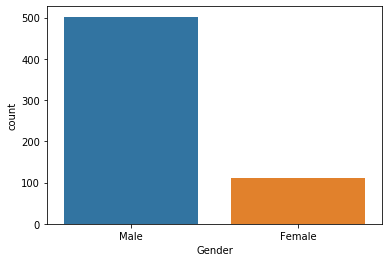

In [12]:
sns.countplot(train['Gender'])

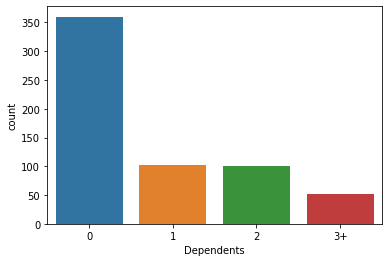

In [13]:
sns.countplot(train['Dependents'])

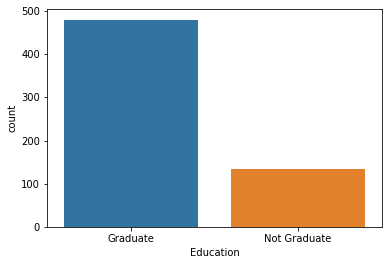

In [14]:
sns.countplot(train['Education'])

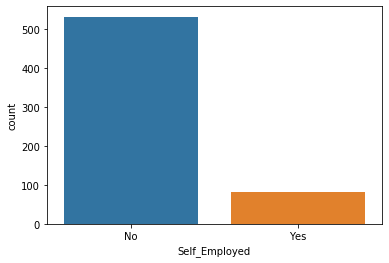

In [15]:
sns.countplot(train['Self_Employed'])

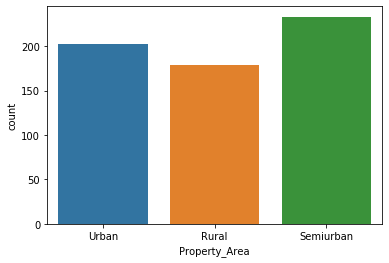

In [16]:
sns.countplot(train['Property_Area'])

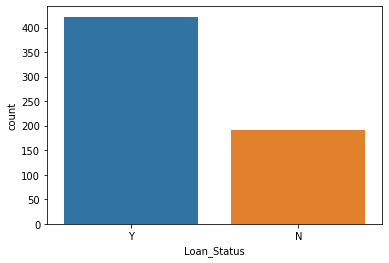

In [17]:
sns.countplot(train['Loan_Status'])

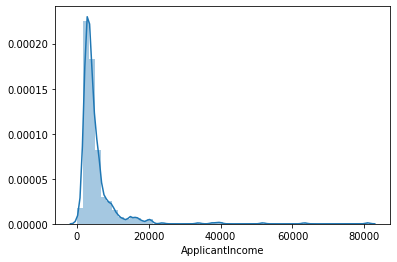

In [20]:
sns.distplot(train['ApplicantIncome'])

In [46]:
train['ApplicantIncomeLog']=np.log(train['ApplicantIncome'])

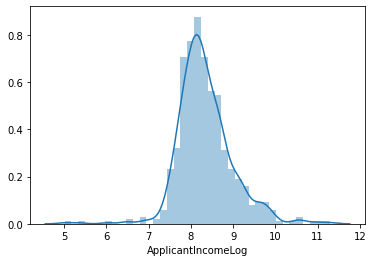

In [47]:
sns.distplot(train['ApplicantIncomeLog'])

C:\Users\ps783\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


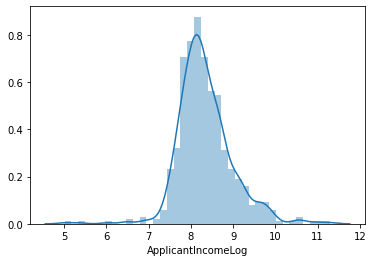

In [48]:
train['CoapplicantIncomeLog']=np.log(train['CoapplicantIncome'])
sns.distplot(train['ApplicantIncomeLog'])

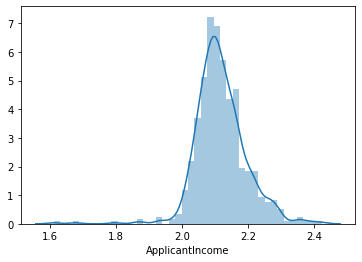

In [26]:
sns.distplot(train['ApplicantIncome'])

In [50]:
train['LoanAmountLog']=np.log(train['LoanAmount'])

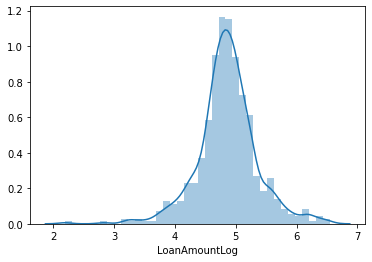

In [51]:
sns.distplot(train['LoanAmountLog'])

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

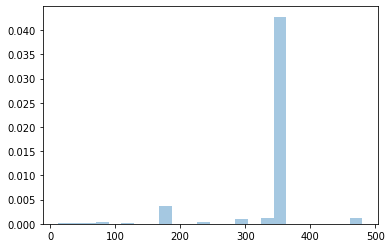

In [31]:
sns.distplot(train['Loan_Amount_Term'])

In [32]:
train['Loan_Amount_TermLog']=np.log(train['Loan_Amount_Term'])

In [52]:
sns.distplot(train['Loan_Amount_TermLog'])

KeyError: 'Loan_Amount_TermLog'

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

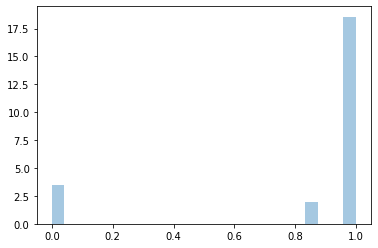

In [34]:
sns.distplot(train['Credit_History'])

In [43]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


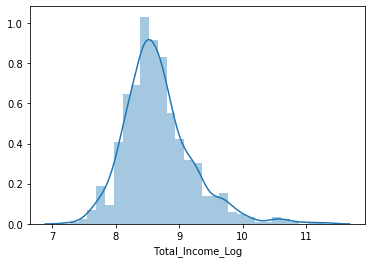

In [44]:
train['Total_Income_Log']=np.log(train['Total_Income'])
sns.distplot(train['Total_Income_Log'])

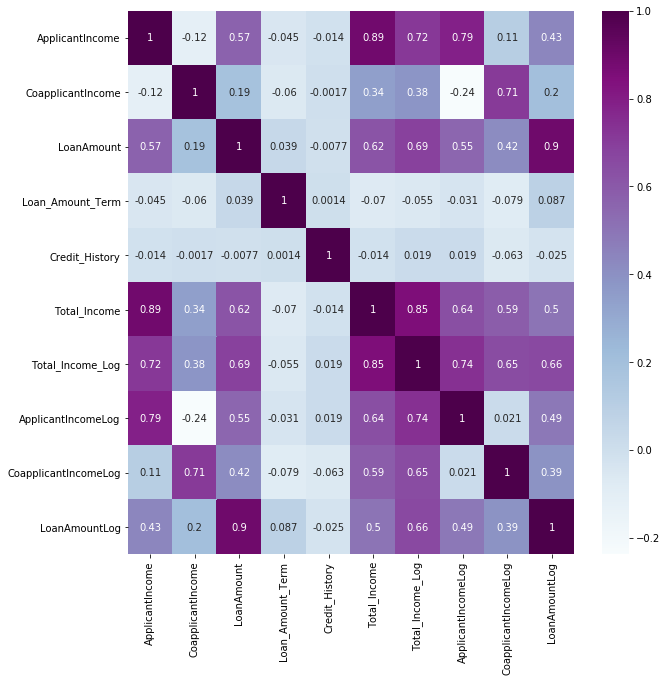

In [53]:
corr=train.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,cmap='BuPu')

# Pre-processing and Training Data Development

In [55]:
cols=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Total_Income','Loan_ID','CoapplicantIncomeLog']

In [56]:
train=train.drop(columns=cols,axis=1)

In [57]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Total_Income_Log,ApplicantIncomeLog,LoanAmountLog
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674026,8.674026,4.986426
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.714568,8.430109,4.852030
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006368,8.006368,4.189655
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,8.505323,7.856707,4.787492
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699515,8.699515,4.948760


In [65]:
from sklearn.preprocessing import LabelEncoder
cols=['Gender','Married','Education','Dependents','Self_Employed','Property_Area','Loan_Status']
le=LabelEncoder()
for col in cols:
    train[col]=le.fit_transform(train[col])

In [66]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Total_Income_Log,ApplicantIncomeLog,LoanAmountLog
0,1,0,0,0,0,1.0,2,1,8.674026,8.674026,4.986426
1,1,1,1,0,0,1.0,0,0,8.714568,8.430109,4.852030
2,1,1,0,0,1,1.0,2,1,8.006368,8.006368,4.189655
3,1,1,0,1,0,1.0,2,1,8.505323,7.856707,4.787492
4,1,0,0,0,0,1.0,2,1,8.699515,8.699515,4.948760


In [67]:
X=train.drop(columns=['Loan_Status'],axis=1)
y=train['Loan_Status']

In [68]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=42)


# Modeling

In [70]:
from sklearn.model_selection import cross_val_score
def classify(model,X,y):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=42)
    model.fit(x_train,y_train)
    print("Accuracy is",model.score(x_test,y_test)*100)
    score=cross_val_score(model,X,y,cv=5)
    print('cross validation is',np.mean(score)*100)

In [71]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
classify(model,X,y)

Accuracy is 80.45602605863192
cross validation is 80.9462881514061


In [72]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
classify(model,X,y)

Accuracy is 71.33550488599349
cross validation is 72.80154604824736


In [73]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model=RandomForestClassifier()
classify(model,X,y)

Accuracy is 78.50162866449512
cross validation is 78.50593096094896


In [74]:
model=ExtraTreesClassifier()
classify(model,X,y)

Accuracy is 75.2442996742671
cross validation is 76.38811142209782


# Hyperparameter Tuning

In [77]:
model=RandomForestClassifier(n_estimators=50,min_samples_split=25,max_depth=7,max_features=1)
classify(model,X,y)

Accuracy is 79.80456026058633
cross validation is 80.29588164734108


# Confusion Matrix

In [78]:
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [80]:
from sklearn.metrics import confusion_matrix
y_pred=model.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 49,  51],
       [  9, 198]], dtype=int64)

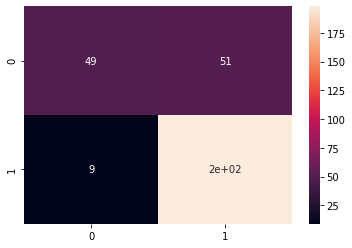

In [81]:
sns.heatmap(cm,annot=True)